## Import

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

## Load Clusters

In [5]:
df = pd.read_csv("clustered_articles.csv")
df.head()


,title,url,is_fraud_related,cluster
0,The Outseer PlatformOutseer PlatformOutseer Ri...,https://www.outseer.com/fraud-and-payment-blog,False,1
1,Outseer PlatformOutseer Risk Engine™Outseer Gl...,https://www.outseer.com/fraud-and-payment-blog,False,1
2,Outseer Global Data Network™,https://www.outseer.com/technology/outseer-glo...,False,1
3,Featured Report >2024 Global Fraud and Scams T...,https://www.outseer.com/fraud-and-payment-blog,True,2
4,2024 Global Fraud and Scams Trends Report: AI-...,https://www.outseer.com/reports/2024-global-fr...,True,2


## Cluster Size and Summary

In [8]:
df = pd.read_csv("clustered_articles.csv")

# If you still have the duplicate header row from earlier, drop it:
df = df[df["title"] != "title"].copy()

# Convert is_fraud_related to numeric 0/1
df["is_fraud_related_num"] = (
    df["is_fraud_related"]
    .astype(str)
    .str.lower()
    .map({"true": 1, "false": 0})
)

print(df[["is_fraud_related", "is_fraud_related_num"]].head())

print("Cluster sizes:")
print(df["cluster"].value_counts().sort_index())

print("\nFraud-related % by cluster:")
print(df.groupby("cluster")["is_fraud_related_num"].mean())


  is_fraud_related  is_fraud_related_num
0            False                     0
1            False                     0
2            False                     0
3             True                     1
4             True                     1
Cluster sizes:
cluster
0    10
1     6
2     8
3    12
4     4
Name: count, dtype: int64

Fraud-related % by cluster:
cluster
0    0.800000
1    0.000000
2    1.000000
3    0.666667
4    1.000000
Name: is_fraud_related_num, dtype: float64


## Titles by Cluster

In [9]:
for c in sorted(df["cluster"].unique()):
    print(f"\n=== Cluster {c} ===")
    titles = df[df["cluster"] == c]["title"].head(5)
    for t in titles:
        print("-", t)



=== Cluster 0 ===
- Outseer Fraud ManagerProtect customer digital interactions with risk-based decisions while delivering a frictionless user experience.
- Outseer FraudAction™Protect your brand and your customers with our 24/7 fraud intelligence and cyberattack takedown service.
- Use CasesBrand AbuseTransaction Fraud PreventionFraud IntelligencePhishing DetectionMeeting PSD2 Requirements
- Transaction Fraud Prevention
- Meeting PSD2 Requirements

=== Cluster 1 ===
- The Outseer PlatformOutseer PlatformOutseer Risk Engine™Outseer Global Data Network™
- Outseer PlatformOutseer Risk Engine™Outseer Global Data Network™
- Outseer Global Data Network™
- The Outseer PlatformOutseer PlatformOutseer Risk Engine™Outseer Global Data Network™
- Outseer PlatformOutseer Risk Engine™Outseer Global Data Network™

=== Cluster 2 ===
- Featured Report >2024 Global Fraud and Scams Trends Report: AI-Powered Scams, Malware-as-a-Service, and Faster Payment Threats
- 2024 Global Fraud and Scams Trends Repo

## Cleaning work before visuals

In [11]:
df = pd.read_csv("clustered_articles.csv")

# Drop the duplicated header row
df = df[df["title"] != "title"].copy()

# Save a clean version
df.to_csv("clustered_articles_clean.csv", index=False)

print(len(df), "rows in clean file")

40 rows in clean file


## Automatic Labeling

In [17]:
# Choose which text field to use; fall back to title if needed
text_col = "title"
if "summary" in df.columns:
    text_col = "summary"

# Simple TF-IDF on unigrams and bigrams
vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    max_features=2000
)

X_text = vectorizer.fit_transform(df[text_col].astype(str))
feature_names = np.array(vectorizer.get_feature_names_out())

def top_terms_for_cluster(cluster_id, top_n=10):
    idx = df["cluster"] == cluster_id
    # average tf-idf within the cluster
    mean_tfidf = X_text[idx].mean(axis=0).A1
    top_idx = mean_tfidf.argsort()[::-1][:top_n]
    return feature_names[top_idx]

for c in sorted(df["cluster"].unique()):
    print(f"\n=== Cluster {c} top terms ===")
    print(", ".join(top_terms_for_cluster(c, top_n=10)))



=== Cluster 0 top terms ===


AttributeError: 'Series' object has no attribute 'nonzero'

## Visualization of Clusters

len(df) = 40
embeddings shape = (41, 384)
points shape = (40, 2)
cluster length = 40


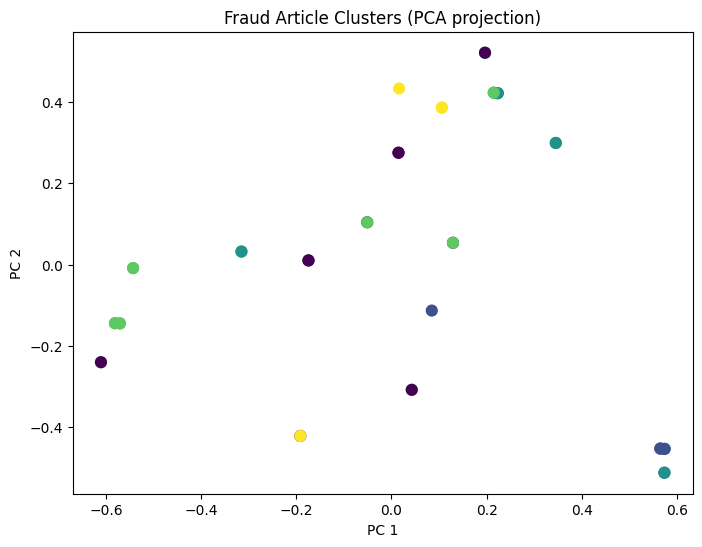

In [ ]:
# Load clean clustered data
df = pd.read_csv("clustered_articles_clean.csv")

# Load embeddings
embeddings = np.load("embeddings/fraud_articles_embeddings.npy")

print("len(df) =", len(df))
print("embeddings shape =", embeddings.shape)

# If the extra row was just that duplicated header at the top,
# we can trim embeddings to match the cleaned df:
embeddings = embeddings[: len(df)]

# Reduce to 2D
pca = PCA(n_components=2, random_state=42)
points = pca.fit_transform(embeddings)

# Make sure lengths match before plotting
print("points shape =", points.shape)
print("cluster length =", len(df["cluster"]))

plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=df["cluster"], s=60)
plt.title("Fraud Article Clusters (PCA projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


In [15]:
df = pd.read_csv("clustered_articles_clean.csv")

df["is_fraud_related_num"] = (
    df["is_fraud_related"]
    .astype(str)
    .str.lower()
    .map({"true": 1, "false": 0})
)

print("Cluster sizes:")
print(df["cluster"].value_counts().sort_index())

print("\nFraud-related % by cluster:")
print(df.groupby("cluster")["is_fraud_related_num"].mean())


Cluster sizes:
cluster
0    10
1     6
2     8
3    12
4     4
Name: count, dtype: int64

Fraud-related % by cluster:
cluster
0    0.800000
1    0.000000
2    1.000000
3    0.666667
4    1.000000
Name: is_fraud_related_num, dtype: float64


# Cluster Analysis

This analysis applies K-Means clustering (k = 5) to sentence-transformer embeddings of 40
scraped fintech security and fraud-related articles. The objective was to identify
natural thematic groupings and to evaluate how strongly each cluster aligns with
fraud-focused content.

---

## Cluster Sizes

| Cluster | Articles |
|--------:|-----------|
| 0 | 10 |
| 1 | 6 |
| 2 | 8 |
| 3 | 12 |
| 4 | 4 |

All clusters are reasonably sized, with no single cluster dominating the dataset,
indicating balanced segmentation.

---

## Fraud Relevance by Cluster

Fraud prevalence was calculated as the mean of a binary fraud label (1 = fraud-related,
0 = not fraud-related):

| Cluster | Fraud % |
|--------:|----------|
| 0 | **80%** |
| 1 | **0%** |
| 2 | **100%** |
| 3 | **66.7%** |
| 4 | **100%** |

These values illustrate sharp differences in topical focus among the clusters.

---

## Cluster Interpretations

### Cluster 1 — Platform & Corporate Content (0% Fraud)

This cluster contains exclusively non-fraud documents, primarily focused on high-level
platform descriptions and corporate messaging (e.g., product platforms, data networks,
and marketing pages).

**Interpretation:**  
This cluster represents general brand or product overview content rather than operational
fraud discussions. Its clean separation from other groups validates that the embedding
model can distinguish corporate messaging from technical or analytical fraud topics.

---

### Cluster 2 — Fraud & Scam Trend Analysis (100% Fraud)

This cluster consists entirely of fraud-related reports and articles that analyze current
scam activity, emerging threats, and industry-wide fraud patterns. Examples include
annual or global fraud trend reports and policy or coordination frameworks.

**Interpretation:**  
The uniform fraud relevance of this cluster suggests a highly coherent semantic grouping
focused on descriptive and analytical commentary about scams and attack trends.

---

### Cluster 4 — Behavioral Scam Disruption & Training (100% Fraud)

This smaller cluster contains documentary and webinar content focused on behavioral
approaches to disrupting scam victimization and improving fraud prevention practices.

**Interpretation:**  
Although thematically close to Cluster 2, this group emphasizes **intervention
and mitigation strategies** rather than descriptive trend reporting. This subdivision
demonstrates the embedding model’s ability to differentiate *what scams are happening*
from *how scams are addressed or mitigated*.

---

### Cluster 0 — Fraud Prevention Solutions & Compliance (80% Fraud)

Cluster 0 centers on practical fraud-prevention tools and regulatory compliance solutions,
including transaction fraud prevention products, PSD2 compliance platforms, and fraud
takedown or response services.

**Interpretation:**  
The cluster bridges marketing and operational security content. Not all articles are
explicitly labeled as fraud-related; however, most address technology designed to combat
fraud threats, explaining the high but not total fraud prevalence.

---

### Cluster 3 — Behavioral Biometrics & Identity Security (66.7% Fraud)

This cluster describes authentication technologies, biometric verification systems, and
broader identity-security solutions. While often associated with fraud prevention, these
technologies also address user security and access management more broadly.

**Interpretation:**  
This cluster serves as a transitional semantic group between pure fraud content and general
cybersecurity topics. Its moderate fraud prevalence reflects overlap between identity
security and fraud detection use cases.

---

---

## PCA Visualization Findings

Principal Component Analysis (PCA) was applied to reduce the 384-dimensional embeddings
to two dimensions for visualization. The 2-D projection revealed:

- Clear separation of **corporate branding (Cluster 1)** from fraud-focused clusters.
- **Clusters 2 and 4** appearing tightly grouped, reflecting related analytical and
  behavioral mitigation topics.
- Partial overlap between **Clusters 0 and 3**, consistent with their shared focus on
  fraud prevention technology and identity security solutions.

These spatial relationships indicate strong semantic structuring of the content that
aligns with domain expectations across fraud analysis, solution tooling, and platform
marketing narratives.

---

## Evaluation Summary

Embedding-based clustering effectively separated major thematic categories within the
dataset:

- Corporate branding content forms a distinct, non-fraud cluster.
- Analytical fraud reporting and behavioral disruption strategies organize into
  high-purity fraud-focused clusters.
- Cybersecurity platforms and identity tools bridge fraud prevention and broader
  security topics, producing expected thematic overlap.

Overall, clustering results validate the ability of modern document embeddings to capture
meaningful domain structure and to distinguish between fraud-centric and non-fraud content
within fintech security literature.
